Let's say a McDonald's has a lunch rush from 12:30pm to 1:00pm. From looking at customer sales from previous days, we know that on average 10 customers enter during 12:30pm to 1:00pm. What is the probability that exactly 7 customers enter during lunch rush? What is the probability that more than 10 customers arrive?

Let's begin by thinking about how many customers we expect to come into McDonald's during lunch rush. Well we were actually already given that information, it's 10. This means that the mean is 10, then our expected value E(X)=10. In the Poisson distribution this is λ. So the mean = λ for a Poisson Distribution, it is the expected number of occurences over the specfied interval.

In [4]:
# solve with Python

# don't use lambda as an object name. That is already reserved in Python

# set lambda
lamb = 10

# set k to the number of occurances
k=7

# set up e and factorial math statements
from math import exp
from math import factorial
from __future__ import division

# now the PMF probability mass function
prob = (lamb**k)*exp(-lamb)/factorial(k)

# convert to percentage form and print
print ' There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*prob)

 There is a 9.01 % chance that exactly 7 customers show up at the lunch rush


In [5]:
# now we use scipy to automate the PMF

In [12]:
# import the distribution from scipy.stats
from scipy.stats import poisson

# set mean = 10 customers for lunch rush
mu = 10

# get mean and variance
mean,var = poisson.stats(mu)

# we can also calculate the PMF at specific points, such as the odds of exactly 7 customers
odds_seven = poisson.pmf(7,mu)

#print
print ' There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*odds_seven)

# print the mean
print 'The mean is %2.2f ' %mean

 There is a 9.01 % chance that exactly 7 customers show up at the lunch rush
The mean is 10.00 


In [13]:
# now lets look at the entire distribution

# get the PMF and plot it
import numpy as np

# Let's see the PMF for all the way to 30 customers, remember theoretically infinite number could show up
k=np.arange(30)

# average of 10 customers
lamb = 10

pmf_pois = poisson.pmf(k,lamb)

<Container object of 30 artists>

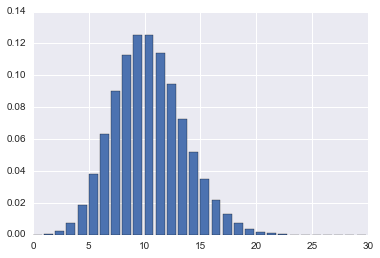

In [15]:
# now do the plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# barplot
plt.bar(k,pmf_pois)


For the question: What is the probability that more than 10 customers arrive? We need to sum up the value of every bar past 10 the 10 customers bar.

We can do this by using a Cumulative Distribution Function (CDF). This describes the probability that a random variable X with a given probability distribution (such as the Poisson in this current case) will be found to have a value less than or equal to X.

What this means is if we use the CDF to calcualte the probability of 10 or less customers showing up we can take that probability and subtract it from the total probability space, which is just 1 (the sum of all the probabilities for every number of customers).

In [17]:
# scipy has a builtin cdf we can use

# set out for k = 10 for ten customers, set mean = 10 for the average of ten customers
k,mu = 10,10

# probability that 10 or less customers show up is
prob_up_to_ten = poisson.cdf(k,mu)

#print
print ' The probability that 10 or less customers show up is %2.1f %%. ' %(100*prob_up_to_ten) 

 The probability that 10 or less customers show up is 58.3 %. 


In [18]:
# Now we can answer the question for more than 10 customers. It will be the remaining probability space
prob_more_than_ten = 1 - prob_up_to_ten

print ' The probability that more than 10 customers show up is %2.1f %%. ' %(100*prob_more_than_ten) 

 The probability that more than 10 customers show up is 41.7 %. 



That's it for the basics of the poisson distribution! More free info can be found at these sources:

1.)http://en.wikipedia.org/wiki/Poisson_distribution#Definition

2.)http://stattrek.com/probability-distributions/poisson.aspx

3.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html